In [29]:
import pandas as pd
import numpy as np

def generate_iris_summary(file_path):
    # Membaca file CSV
    df = pd.read_csv(file_path)
    
    # Menentukan kolom-kolom numerik yang akan dianalisis
    numeric_cols = ['sepal length', 'sepal width', 'petal length', 'petal width']
    
    # Menginisialisasi dictionary untuk menyimpan hasil statistik
    stats = {}
    
    for col in numeric_cols:
        # Menyimpan statistik dasar untuk masing-masing kolom numerik
        stats[col] = {
            'Min': df[col].min(),       # Nilai minimum
            'Max': df[col].max(),       # Nilai maksimum
            'Mean': df[col].mean(),     # Rata-rata
            'SD': df[col].std()         # Standar deviasi
        }
        
        # Menghitung korelasi antara kolom dan kelas (dengan encoding numerik)
        # Pertama, membuat encoding numerik untuk kolom kelas
        class_encoded = pd.Categorical(df['class']).codes
        correlation = np.corrcoef(df[col], class_encoded)[0, 1]
        stats[col]['Class Correlation'] = correlation
    
    # Menampilkan hasil statistik dalam format yang rapi
    print("Summary Statistics:")
    print(" " * 13 + "Min  Max   Mean   SD   Class Correlation")
    
    for col in numeric_cols:
        # Menampilkan nama kolom dengan perataan yang sesuai
        col_display = f"{col}:"
        col_display = col_display.ljust(14)
        
        # Memformat statistik agar rapi
        stats_str = f"{stats[col]['Min']:4.1f} {stats[col]['Max']:4.1f} {stats[col]['Mean']:5.2f} {stats[col]['SD']:4.2f}    {stats[col]['Class Correlation']:6.4f}"
        
        # Menambahkan tanda (high!) jika korelasi di atas 0.9
        if abs(stats[col]['Class Correlation']) > 0.9:
            stats_str += "  (high!)"
            
        print(col_display + stats_str)

# Menggunakan fungsi
generate_iris_summary('irisdata.csv')


Summary Statistics:
             Min  Max   Mean   SD   Class Correlation
sepal length:  4.3  7.9  5.84 0.83    0.7826
sepal width:   2.0  4.4  3.05 0.43    -0.4194
petal length:  1.0  6.9  3.76 1.76    0.9490  (high!)
petal width:   0.1  2.5  1.20 0.76    0.9565  (high!)


C:\Users\Dika Faris\AppData\Local\Temp\ipykernel_12672\1398609343.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=species_sum, x='species', y='sepal_length', palette='Blues')


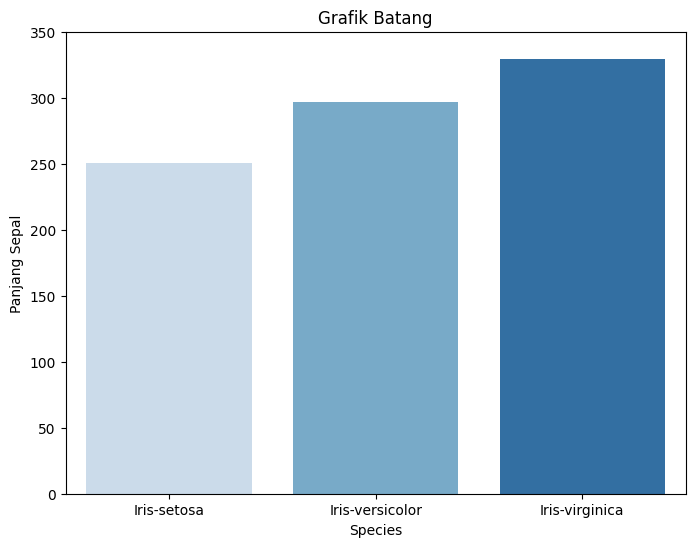

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat dataset Iris
df = pd.read_csv('irisdata2.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Menghitung jumlah panjang sepal untuk setiap spesies
species_sum = df.groupby('species')['sepal_length'].sum().reset_index()

# Membuat grafik batang
plt.figure(figsize=(8, 6))
sns.barplot(data=species_sum, x='species', y='sepal_length', palette='Blues')

# Menambahkan judul dan label sumbu
plt.title('Grafik Batang')
plt.xlabel('Species')
plt.ylabel('Panjang Sepal')

# Menetapkan batas sumbu y hingga 350
plt.ylim(0, 350)

# Menampilkan grafik
plt.show()


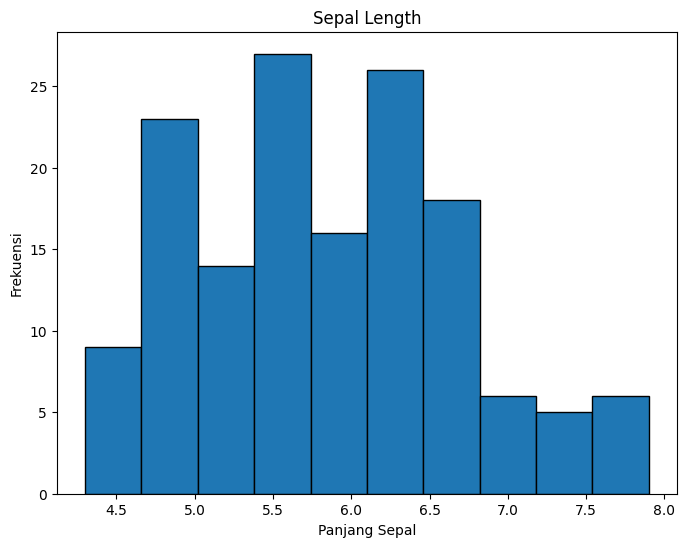

In [31]:
import matplotlib.pyplot as plt

# Membuat histogram untuk kolom sepal_length
plt.figure(figsize=(8, 6))
plt.hist(df['sepal_length'], bins=10, edgecolor='black')
plt.title('Sepal Length')
plt.xlabel('Panjang Sepal')
plt.ylabel('Frekuensi')
plt.show()


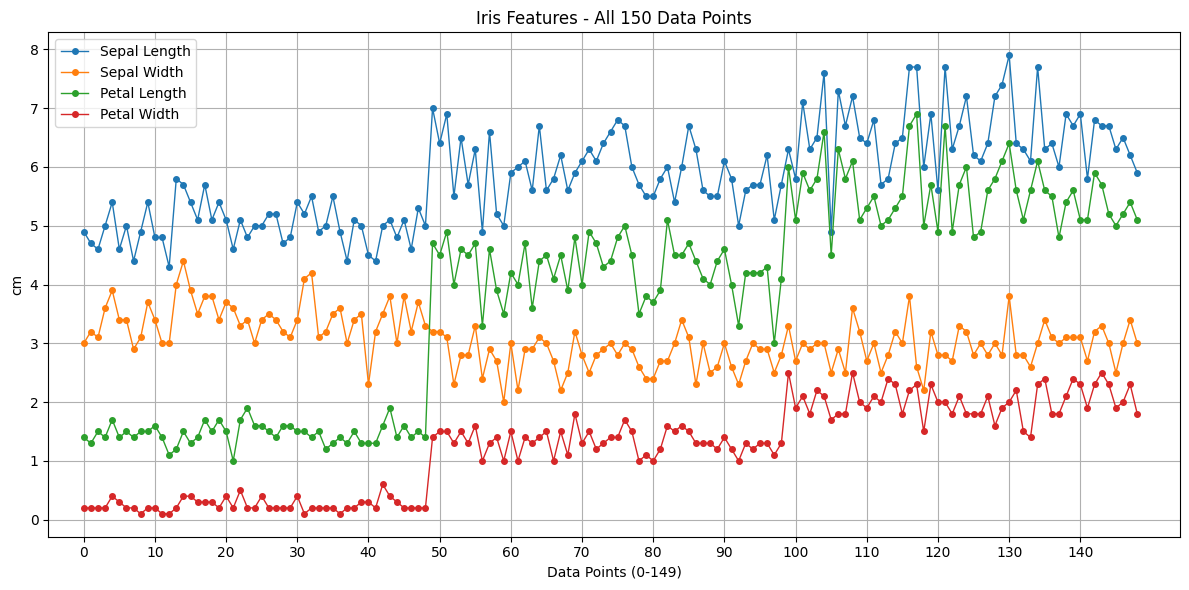

In [32]:
# Memuat dataset dari file CSV
df = pd.read_csv('irisdata2.csv')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Membuat Grafik Garis untuk 150 data
plt.figure(figsize=(12, 6))

# Mereset indeks agar plot menggunakan indeks dari 0 hingga 149
df_reset = df.reset_index()

# Plot setiap fitur (sepal_length, sepal_width, petal_length, petal_width)
plt.plot(df_reset.index, df_reset['sepal_length'], marker='o', label='Sepal Length', linewidth=1, markersize=4)
plt.plot(df_reset.index, df_reset['sepal_width'], marker='o', label='Sepal Width', linewidth=1, markersize=4)
plt.plot(df_reset.index, df_reset['petal_length'], marker='o', label='Petal Length', linewidth=1, markersize=4)
plt.plot(df_reset.index, df_reset['petal_width'], marker='o', label='Petal Width', linewidth=1, markersize=4)

# Kustomisasi grafik
plt.xlabel('Data Points (0-149)')
plt.ylabel('cm')
plt.title('Iris Features - All 150 Data Points')
plt.legend()
plt.grid(True)

# Mengatur batasan sumbu x agar dimulai dari 0 sampai 149
plt.xlim(-5, 154)

# Menambahkan ticks pada sumbu x setiap 10 data points
plt.xticks(np.arange(0, 150, 10))

plt.tight_layout()
plt.show()


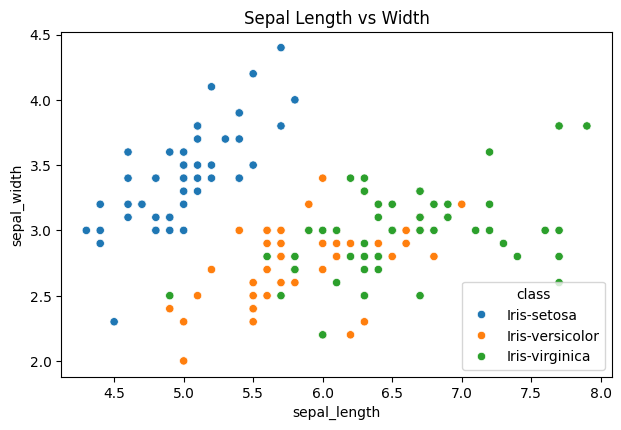

In [35]:
fig = plt.figure(figsize=(12, 8))

# Membuat subplot pertama dari layout 2x2
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='class')
plt.title('Sepal Length vs Width')

# Menyusun tata letak agar lebih rapi
plt.tight_layout()
plt.show()
